#### 1. Importing Visualization Libraries and Data
####  Exploring Relationships
#### 2. Correlations
#### 3. Scattterplot
#### 4. Pair Plot
#### 5. Categorical Plot


### 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.4.3'

In [3]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
# create a path
path = r'/Users/aibee/Desktop/CareerFoundry/6. Advanced Analytics & Dashboard Design /6.1 Sourcing Open Data'

In [5]:
# load data
df = pd.read_csv(os.path.join(path,'boat_data_cleaned.csv'), index_col = False)

In [6]:
df.shape

(6001, 12)

In [7]:
df.columns

Index(['Unnamed: 0', 'Boat Type', 'Manufacturer', 'Type', 'Year Built',
       'Length', 'Width', 'Material', 'Number of views last 7 days',
       'EUR_price', 'Country', 'City'],
      dtype='object')

In [8]:
# Drop the redundant columns
df = df.drop(['Unnamed: 0'],axis = 1)

In [9]:
df

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days,EUR_price,Country,City
0,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,3490.00,Germany,BÃ¶nningstedt
1,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,3399.00,Germany,Bayern
2,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,4.35,1.75,GRP,239,3570.00,Switzerland,Seengen
3,Sport Boat,GS Nautica power boats,Used boat,2004,4.70,2.00,GRP,69,3500.00,Italy,Lake Garda
4,Runabout,Kimple power boats,new boat from stock,2020,4.40,1.65,Aluminium,113,4692.00,Switzerland,Zugersee
...,...,...,...,...,...,...,...,...,...,...,...
5996,Cabin Boat,Princess power boats,Used boat,1974,7.20,2.70,GRP,1299,5100.00,Switzerland,Rhein
5997,"Sport Boat,Wakeboard/Wakesurf,Water ski",Tullio Abbate power boats,"Used boat,Unleaded",1980,6.00,2.10,GRP,1917,5098.98,Switzerland,Lake of Zurich
5998,Fishing Boat,Staempfli power boats,"Used boat,Unleaded",1984,6.00,1.62,Plastic,288,5049.00,Switzerland,Bielersee
5999,Sport Boat,BlueCraft power boats,"new boat from stock,Unleaded",2020,4.40,1.80,GRP,354,4499.00,Germany,Nordrhein-Westfalen


In [10]:
# extract the numeric variables
df_corr = df[['Year Built', 'Length', 'Width',
      'Number of views last 7 days', 'EUR_price']]

# 2. Correlation

In [11]:
# Create a correlation matrix using pandas
df.corr()

,Year Built,Length,Width,Number of views last 7 days,EUR_price
Year Built,1.000000,-0.109371,-0.096872,-0.199541,0.116957
Length,-0.109371,1.000000,0.915815,-0.157784,0.628959
Width,-0.096872,0.915815,1.000000,-0.171367,0.540845
Number of views last 7 days,-0.199541,-0.157784,-0.171367,1.000000,-0.038727
EUR_price,0.116957,0.628959,0.540845,-0.038727,1.000000


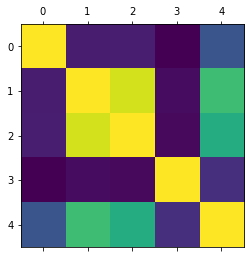

In [12]:
# Create a correlation heatmap using matplotlib

plt.matshow(df_corr.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

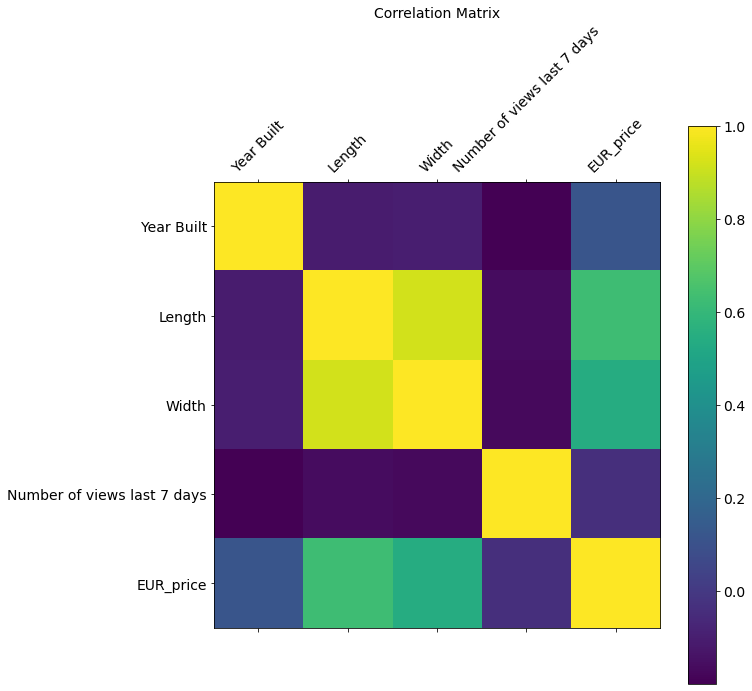

In [13]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(10, 10)) # figure size 
plt.matshow(df_corr.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_corr.shape[1]), df_corr.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_corr.shape[1]), df_corr.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

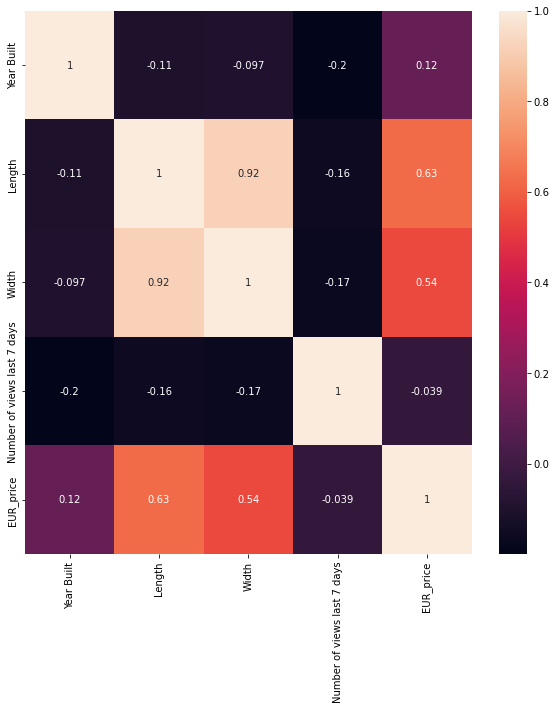

In [14]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_corr.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

#### The strongest positive relationship exist between the size of the boat (represented by the Leghth and Width) and the price. The higher the Length and Width of the boat the higher their price. Also, a positive relationship exist between the year the boat was built and the price. Generally, newer boats are more expensive. 

####  There is a negative relationship between the size of the boat (represented by the Leghth and Width) and the built year. The smaller the boat the older the boat. In reality, bigger boat are built more recently.

# 3. Scatterplot

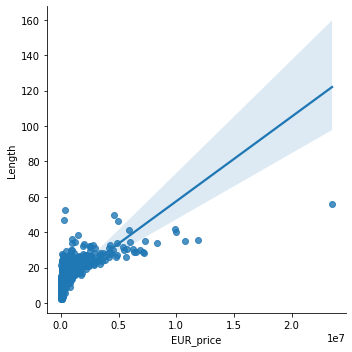

In [15]:
# Creating a random sample of sub dataframe to use for scatterplot
# Create a scatterplot for the "Price" and "Length" columns in seaborn

sns.lmplot(x = 'EUR_price', y = 'Length', data = df_corr)

#### There is a positive relationship between the Length of the boat and the price. In reality, the longer the boat, the more expensive it is. However, most of the boat (about 80%) have their price below 5 million euro. 

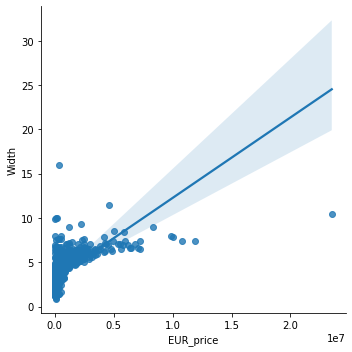

In [16]:
# Create a scatterplot for the "Price" and "Width" columns in seaborn

sns.lmplot(x = 'EUR_price', y = 'Width', data = df_corr)

####  Also, like the Length, there is a positive relationship between the Width of the boat and the price. In reality, the wider the boat, the more expensive it is. However, most of the boat (about 80%) have their price below 5 million euro. 

# 4. Pair Plot

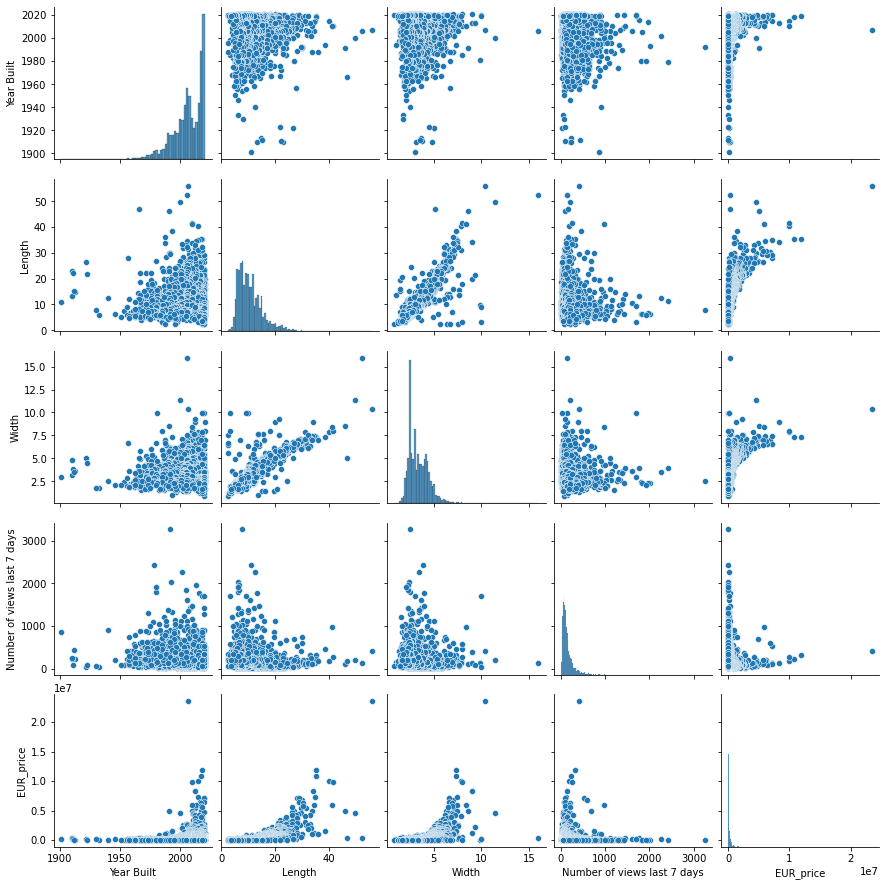

In [17]:
# Create a pair plot 

pair_plot = sns.pairplot(df_corr)

#### I wouldlike to explore futher the relationship between number of visit and price. This is a week negative correlation of (-0.039) between them. This suggests that the higher the price of the boat the more the reduction in the number of viewers (last 7 days). It would be interesting to know if there are other factors that contributes to this. Such as type of boats, manufacturer, location amongst others.

#### Likewise, the is a postive relationship between price and built year (0.12). However, it can be seen from the the plot that quite a number of newer boats are also cheap. Therefore, I would like to explore the main determinant of the boat prices.

# 5. Categorical Plot

<AxesSubplot:xlabel='Length', ylabel='Count'>

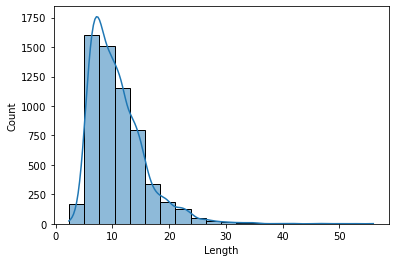

In [18]:
# Create a histogram of duration variable 
sns.histplot(df['Length'], bins =20, kde = True )

In [19]:
# source- https://www.omao.noaa.gov/learn/small-boat-program/resources/length-vessel-class

# Create a categorical variable of Lenth with categories for Class A, Class I, Class II, Class III and Small Research Vessel (SRV). durations
df.loc[df['Length'] < 4.88, 'Boat Class'] = 'Class A'

In [20]:
df.loc[(df['Length'] >= 4.88) & (df['Length'] < 7.93), 'Boat Class'] = 'Class I'

In [21]:
df.loc[(df['Length'] >= 7.93) & (df['Length'] < 12.19), 'Boat Class'] = 'Class II'

In [22]:
df.loc[(df['Length'] >= 12.19) & (df['Length'] <= 19.81), 'Boat Class'] = 'Class III'

In [23]:
df.loc[df['Length'] > 19.81, 'Boat Class'] = 'Small Research Vessel'

In [24]:
# Checking the distribution of the Boat Class category variable 
df['Boat Class'].value_counts(dropna = False)

Class II                 2244
Class I                  1805
Class III                1508
Small Research Vessel     318
Class A                   126
Name: Boat Class, dtype: int64

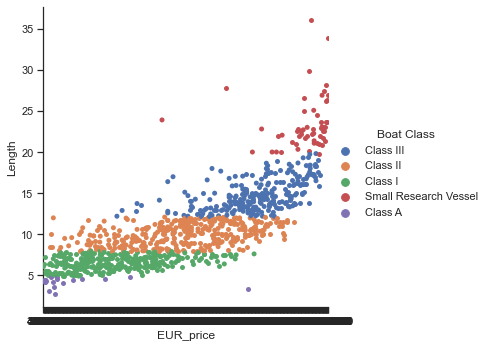

In [25]:
# Create a categorical plot in seaborn using the boat class categories created above
sns.set(style="ticks")
cat_plot = sns.catplot(x="EUR_price", y="Length", hue="Boat Class", data= df.sample(1000))

#### The categorical plot shows that the price of the boat increases according to the length measured in meters. In general, Class A boats are the shortest and consequently are amongest the cheapest. Likewise, SRV and Class III boats are amongst the two longest boat and also the most expensive out of the lots.

#### N:B I have a lot of chanllenges plotting this chart, it takes hours before I could get an output even after reducing the sample size. Also, my X- axis did not return readable intervals

# 6. Questions 

#### Question: Characteristics of the most viewed boat listing in the last 7 days
#### From the exploration we made so far, smaller boats which built year are more recent receives more view. In general, bigger boats are more expensive. This includes Class III boats and SRV with fewer demands.


#### Question: What is the price of boat that get the most views?
#### More than 50% of the views in the last 7 days are from ships that cost 5 miilion euros of less.

#### N:B The other questions are not yet explored.

# 7. Hypotheses

### 1. If a boat has more views, then the boat is not expensive


